In [192]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import math

In [144]:
# Dataframe from google drive - workout data
df = pd.read_csv(r'C:\Users\Manuel Elizaldi\Desktop\Learning-Testing\PyStrava\Outputs\All_Workouts_Table.csv')

In [125]:
df_model = df[['distance','workout_time_min','calories','total_elevation_gain',
 'average_speed_km/h',
 'max_speed_km/h',
 'average_temp',
 'average_heartrate',
 'max_heartrate',
 'avg_time_per_lap',
 'lap_count',
 'effort_score_label']]

## Exploring relationships

c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


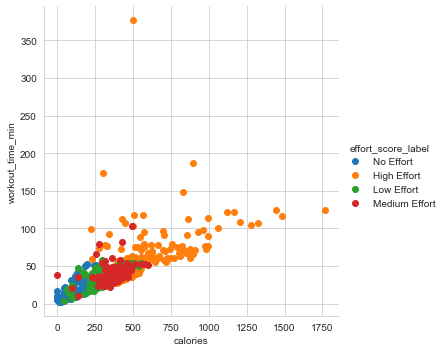

In [143]:
df_cal_time = df[['calories','workout_time_min','effort_score_label']]
rows_to_drop = df_cal_time[df_cal_time == 1].dropna(how='all').index
df_maxheart_time = df_cal_time.drop(rows_to_drop)

sns.set_style('whitegrid')
sns.FacetGrid(df_cal_time, hue='effort_score_label', size=5).map(plt.scatter,'calories','workout_time_min').add_legend()
plt.show()

c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


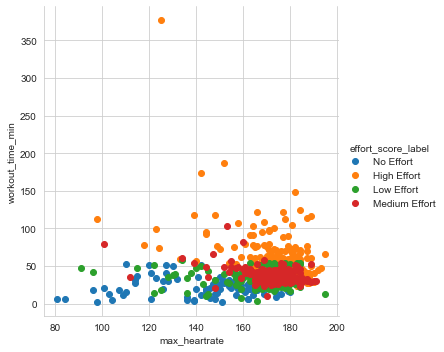

In [140]:
df_maxheart_time = df[['max_heartrate','workout_time_min','effort_score_label']]
rows_to_drop = df_maxheart_time[df_maxheart_time == 1].dropna(how='all').index
df_maxheart_time = df_maxheart_time.drop(rows_to_drop)

sns.set_style('whitegrid')
sns.FacetGrid(df_maxheart_time, hue='effort_score_label', size=5).map(plt.scatter,'max_heartrate','workout_time_min').add_legend()
plt.show()

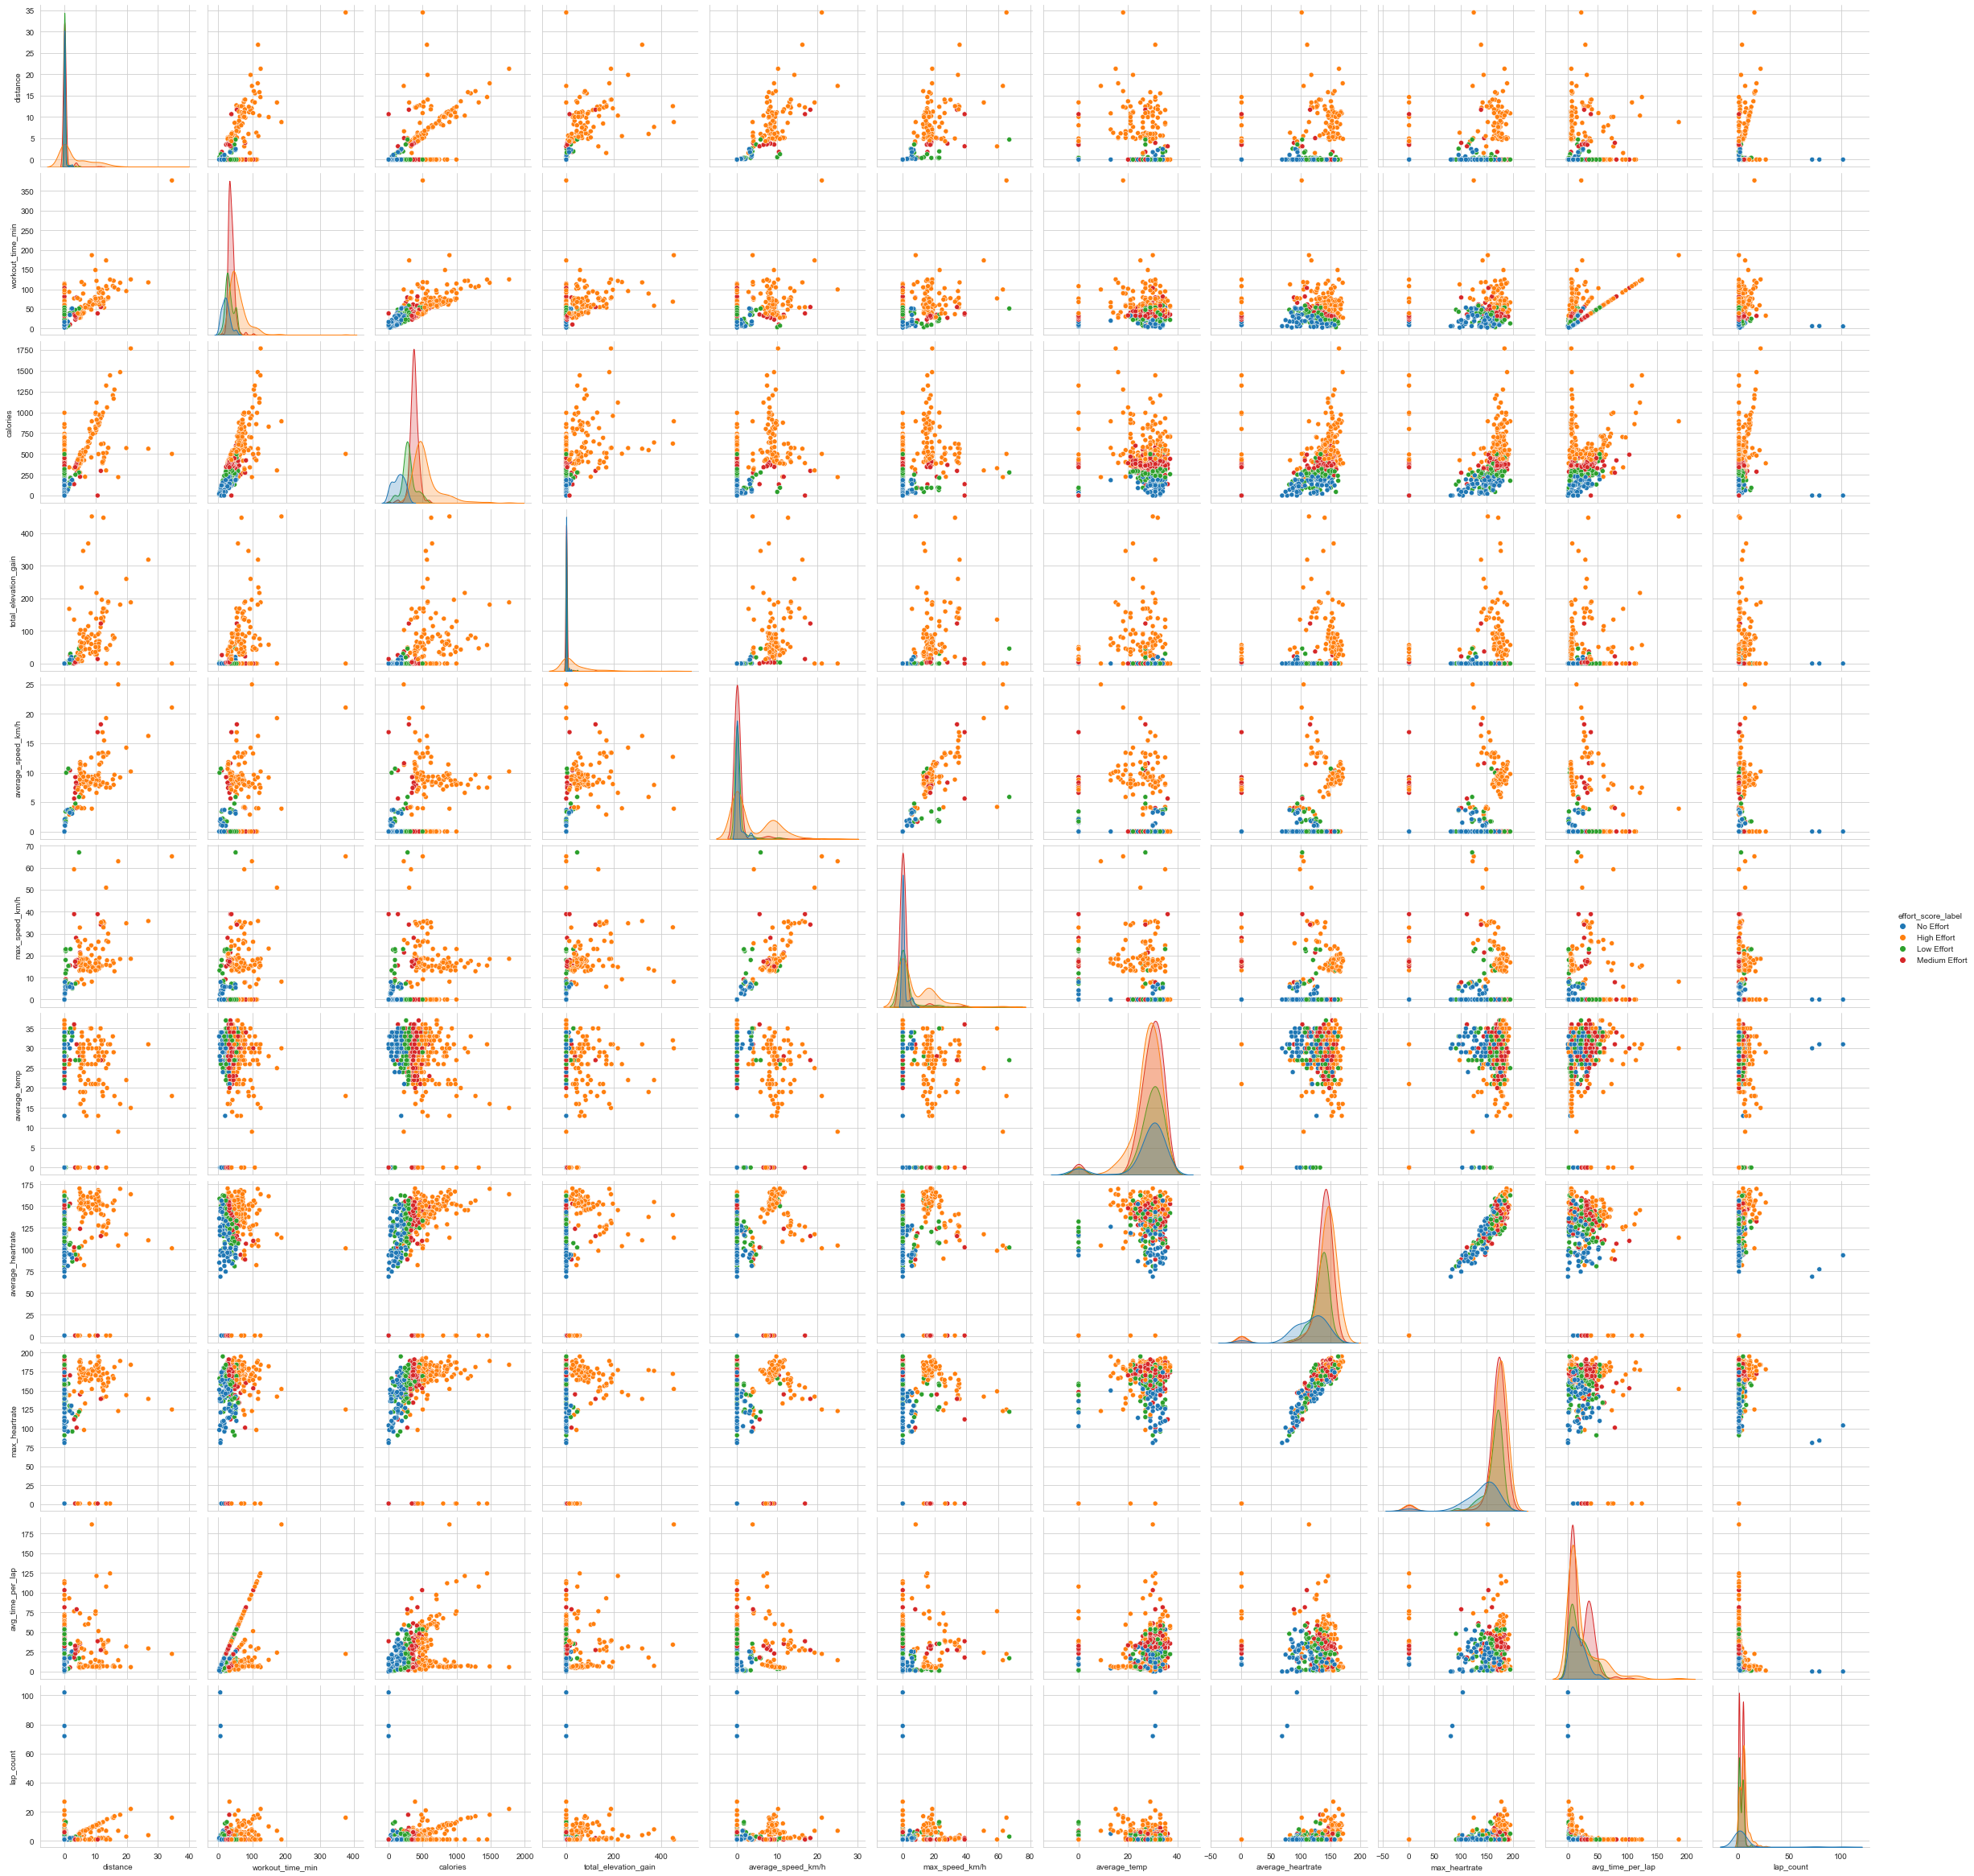

In [129]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df_model, hue='effort_score_label', height=3)
plt.show()

In [148]:
# Fixing Nans, if we drop, we lose too much data
df = df.fillna(0)
len(df)

703

In [146]:
y = df.iloc[:,30:31]
X = df[[
 'distance',
 'workout_time_min',
 'calories',
 'total_elevation_gain',
 'average_speed_km/h',
 'max_speed_km/h',
 'average_temp',
 'average_heartrate',
 'max_heartrate',
 'avg_time_per_lap',
 'lap_count',
 'effort_score']]

# checking lenght 
print(len(X))
print(len(y))

In [149]:
# Compute correlation using Pearson method
correlation_matrix = X.corr(method='pearson')

In [150]:
# Importing to excel to analyze correlation coefficients
#correlation_matrix.to_csv(r'C:\Users\Manuel Elizaldi\Desktop\Learning-Testing\PyStrava\Outputs\correlation_matrix_variables.csv')

In [189]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(X_train, y_train)

# Predict labels for the test data
y_pred = knn.predict(X_test)

c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [190]:
result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:,')
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[56  0  2  0]
 [ 0 18  0  1]
 [ 0  0 45  0]
 [ 0  2  0 17]]
Classification Report:,
               precision    recall  f1-score   support

  High Effort       1.00      0.97      0.98        58
   Low Effort       0.90      0.95      0.92        19
Medium Effort       0.96      1.00      0.98        45
    No Effort       0.94      0.89      0.92        19

     accuracy                           0.96       141
    macro avg       0.95      0.95      0.95       141
 weighted avg       0.97      0.96      0.96       141

Accuracy: 0.9645390070921985


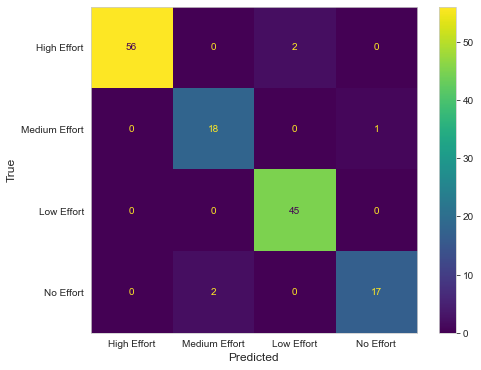

In [191]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['High Effort','Medium Effort','Low Effort','No Effort'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as desired
cmd.plot(ax=ax)

# Customize the plot properties
ax.set_xlabel('Predicted', fontsize=12)  # Set the x-axis label and font size
ax.set_ylabel('True', fontsize=12)  # Set the y-axis label and font size

# Remove grid lines
ax.grid(False)

plt.show()

## Model with score columns

In [171]:
y = df.iloc[:,30:31]
X = df[[
 'distance_score',
 'workout_time_score',
 'calorie_score',
 'total_elevation_gain_score',
 'average_heartrate_score',
 'max_heartrate_score',
 'avg_time_per_lap_score',
 'lap_count_score',
 'avg_speed_score',
 'max_speed_score',
 'effort_score']]

In [178]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

# Create the KNN model
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(X_train, y_train)

# Predict labels for the test data
y_pred = knn.predict(X_test)

c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [183]:
result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:,')
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[144   0  11   0]
 [  0  67   0   6]
 [  4   7 122   0]
 [  0   2   0  59]]
Classification Report:,
               precision    recall  f1-score   support

  High Effort       0.97      0.93      0.95       155
   Low Effort       0.88      0.92      0.90        73
Medium Effort       0.92      0.92      0.92       133
    No Effort       0.91      0.97      0.94        61

     accuracy                           0.93       422
    macro avg       0.92      0.93      0.93       422
 weighted avg       0.93      0.93      0.93       422

Accuracy: 0.9289099526066351


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

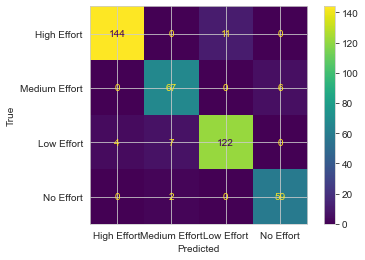

In [182]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['High Effort','Medium Effort','Low Effort','No Effort'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')